Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob

Import Dataset

In [ ]:
import pandas as pd

# Ganti 'nama_file.csv' dengan nama file yang ingin Anda baca
# Jika file berada di folder lain, sertakan path lengkapnya, contoh: 'data/nama_file.csv'
df = pd.read_csv('/content/tokopedia-product-reviews-2019.csv')

# Tampilkan 5 baris pertama dari DataFrame untuk memastikan data terbaca dengan benar
print(df)

       Unnamed: 0                                               text  rating  \
0               1             Barang sesuai pesanan dan cepat sampai       5   
1               2                           Barang bagus harga murah       5   
2               3    Paket rapi...mantap....cepat....sampe ke tujuan       5   
3               4                         ya saya puas dgn barangnya       5   
4               5                       Responya luar biasa b mantap       5   
...           ...                                                ...     ...   
40602       40889                gak bisa ditutup.. ukuran gak pas..       1   
40603       40890  Penjual krg peduli dan brg jelek. Brg yg dikir...       1   
40604       40891  pelayanan kurang sigap, berhari2 dr nanya baik...       1   
40605       40892  barang yg dikirim tsk sesuai wrn, kl memang dr...       1   
40606       40893  Pihak penjual memberikan respon yang buruk kep...       1   

          category                     

Exploratory Data Analysis (EDA)

In [ ]:
# Tampilkan informasi singkat tentang DataFrame, seperti jumlah baris, kolom, dan tipe data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40607 entries, 0 to 40606
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    40607 non-null  int64 
 1   text          40607 non-null  object
 2   rating        40607 non-null  int64 
 3   category      40607 non-null  object
 4   product_name  40607 non-null  object
 5   product_id    40607 non-null  int64 
 6   sold          40593 non-null  object
 7   shop_id       40607 non-null  int64 
 8   product_url   40607 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.8+ MB
None


In [ ]:
# Cetak semua nama kolom di DataFrame
print(df.columns)

Index(['Unnamed: 0', 'text', 'rating', 'category', 'product_name',
       'product_id', 'sold', 'shop_id', 'product_url'],
      dtype='object')


In [ ]:
df.describe()

,Unnamed: 0,rating,product_id,shop_id
count,40607.000000,40607.000000,4.060700e+04,4.060700e+04
mean,20443.690103,4.642574,1.985060e+08,1.342409e+06
std,11810.534919,0.732448,1.284990e+08,1.028990e+06
min,1.000000,1.000000,1.505048e+06,1.563000e+03
25%,10225.500000,4.000000,1.052222e+08,1.625610e+05
50%,20427.000000,5.000000,1.829377e+08,1.787060e+06
75%,30680.500000,5.000000,2.889640e+08,2.048686e+06
max,40893.000000,5.000000,5.028693e+08,5.359950e+06


In [ ]:
df.shape

(40607, 9)

In [ ]:
df['category'].value_counts()

,count
category,
elektronik,15897
fashion,8910
olahraga,7838
handphone,6136
pertukangan,1826


Cleaning Dataset & Check Data Missing

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
text,0
rating,0
category,0
product_name,0
product_id,0
sold,14
shop_id,0
product_url,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)

Customer Satisfaction Analysis Through Ratings and Reviews

In [ ]:
df.fillna({'text': '', 'rating': 0}, inplace=True)

In [ ]:
average_rating = df['rating'].mean()
print(f"AVG rating: {average_rating:.2f}")

AVG rating: 4.64


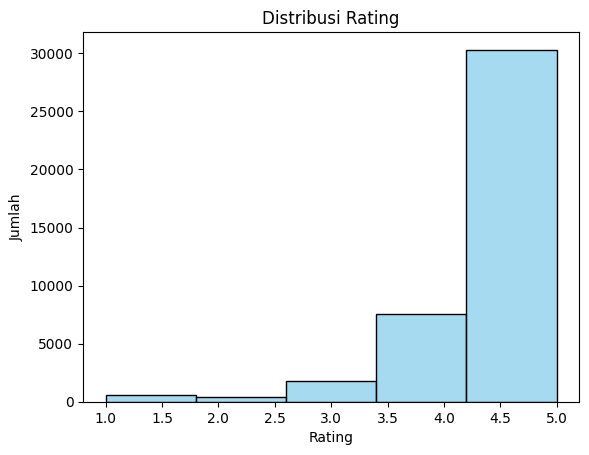

In [ ]:
sns.histplot(df['rating'], bins=5, kde=False, color='skyblue')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
low_rating_reviews = df[df['rating'] < 2]
print(f"Jumlah ulasan dengan rating rendah(*1): {len(low_rating_reviews)}")
print(low_rating_reviews[['text', 'rating']].head())

Jumlah ulasan dengan rating rendah(*1): 543
                                                  text  rating
93              barang yg dikirim tidak sesuai pesanan       1
115  Php, bilang isi ada diseskripsi pas dipesen be...       1
185  Beli staples gak jual isinya... hanya sekali p...       1
252  Sebaiknya kalau mau ngirim barang...diperiksa ...       1
822  barang datang cacat ,gak bisa di gunakan \nhar...       1


In [ ]:
rating_reviews = df[(df['rating'] > 1) & (df['rating'] <= 2)]
print(f"Jumlah ulasan dengan rating (*2): {len(rating_reviews)}")
print(rating_reviews[['text', 'rating']].head())

Jumlah ulasan dengan rating (*2): 382
                                                  text  rating
57                   Pesanan gx sesuai dgn yg d gambar       2
68   Pengiriman dan respon super cepat. Tpi barang ...       2
150    barang jelek copot&#34; terus tmpat taro isinya       2
277   Produk tidak sesuai, order prohex yg dikirim ini       2
313                  brg sdh diterima.................       2


In [ ]:
rating_reviews = df[(df['rating'] > 2) & (df['rating'] <= 3)]
print(f"Jumlah ulasan dengan rating (*3): {len(rating_reviews)}")
print(rating_reviews[['text', 'rating']].head())

Jumlah ulasan dengan rating (*3): 1825
                                                  text  rating
11   Sayang produk yg datang di paking kurang rapi ...       3
24                                Thanksssssssssssssss       3
61                 Barang bagus, kualitas sesuai harga       3
70                      Ok lah.. sesuai denggan harga.       3
103                 Barang sudah sampai.. terima kasih       3


In [ ]:
rating_reviews = df[(df['rating'] > 3) & (df['rating'] <= 4)]
print(f"Jumlah ulasan dengan rating (*4): {len(rating_reviews)}")
print(rating_reviews[['text', 'rating']].head())

Jumlah ulasan dengan rating (*4): 7546
                                         text  rating
25     Barang bagus sesuai info fast response       4
27          barang sudah sy terima gan thanks       4
30  barang sudah di terima, terima kasih ....       4
31            Barang sudah diterima .........       4
34         Produk sesuai pesanan tp blm dcoba       4


In [ ]:
low_rating_reviews = df[df['rating'] > 4]
print(f"Jumlah ulasan dengan rating tertinggi(*5): {len(low_rating_reviews)}")
print(low_rating_reviews[['text', 'rating']].head())

Jumlah ulasan dengan rating tertinggi(*5): 30311
                                              text  rating
0           Barang sesuai pesanan dan cepat sampai       5
1                         Barang bagus harga murah       5
2  Paket rapi...mantap....cepat....sampe ke tujuan       5
3                       ya saya puas dgn barangnya       5
4                     Responya luar biasa b mantap       5


Identify Best-Selling Products and categories

In [ ]:
df['sold'] = pd.to_numeric(df['sold'], errors='coerce')

In [ ]:
df['sold'].fillna(0, inplace=True)

/tmp/ipython-input-1562637520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sold'].fillna(0, inplace=True)


In [ ]:
top_products = df.groupby('product_name')['sold'].sum().sort_values(ascending=False).head(10)
print("10 Produk Terlaris:")
print(top_products)

10 Produk Terlaris:
product_name
jam tangan pria Biden fashion analog bisnis pita jala - Biru                    550850.0
Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo             306152.0
TP-LINK TL-WR 840N 300MBps Wireless Router                                      236421.0
Matras Yoga / Yoga Mat RRT                                                      194016.0
Tenda AC6 Dual Band AC1200 Mbps GIGABIT Wifi ROUTER EXTENDER Repeater           187248.0
Holder anti hujan &amp; copet untuk smartphone / handphone di motor 5,5&#34;    175260.0
Baju Sauna / Sauna Suit Kettler Abu Tua - Abu -abu Tua, XXL                     155204.0
Deker Lutut Athelete Long / dekker / decker knee support                        151640.0
ABS AB Roller Double Wheel Exercise Kettler                                     145415.0
Crimping Tool RJ45 RJ11 Tang Krimping Tools RJ 45                               121912.0
Name: sold, dtype: float64


In [ ]:
top_products = df.groupby('product_name')['sold'].sum().sort_values(ascending=True).head(10)
print("10 Produk Tidak laku:")
print(top_products)

10 Produk Tidak laku:
product_name
&#40;EH137&#41; Gantungan Kunci Siul Whistle Key Finder / Gantungan Kunci Siul    0.0
Kaos Journey Sablon DTG - Navy, XXXXL                                             0.0
Kabel LAN UTP 30M RJ45 Cat 5e Cable 30 Meter terpasang konektor cat5e             0.0
Kabel LAN UTP Cat 5E Vascolink &#40;Meteran&#41;                                  0.0
KAOS STRYPER BIG SIZE - Hitam, XXXXL                                              0.0
Konektor RJ45 AMP / Connector RJ 45 AMP Per Pack Isi 50pcs                        0.0
Kotak Sepatu Pria Flip Buka Depan dengan Frame Plastik                            0.0
Lilin Elektrik 7 Warna /Colorful LED CANDLE LAMPU/MINI LiLin LED                  0.0
Mouse wireless / Bluetooth Airmouse Alcatroz by Powerlogic Resmi murah            0.0
NOKIA 130 dual sim handphone hp                                                   0.0
Name: sold, dtype: float64


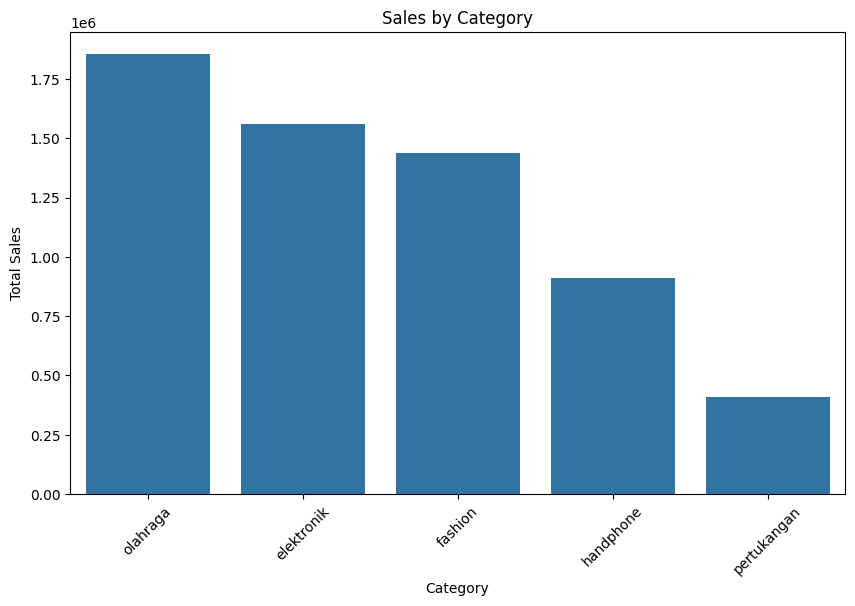

In [ ]:
sales_by_category = df.groupby('category')['sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

In [ ]:
sports_products = df[df['category'].str.contains("olahraga", case=False, na=False)]

In [ ]:
# Remove duplicates (if any)
sports_products_unique = sports_products.drop_duplicates(subset='product_name')

In [ ]:
# Sort by sales and get the top 10
top_sports_products_unique = sports_products_unique.sort_values(by='sold', ascending=False).head(10)

In [ ]:
print("\nTop 10 Best-Selling Unique Products in Sports Category:")
print(top_sports_products_unique[['product_name', 'sold', 'rating']])


Top 10 Best-Selling Unique Products in Sports Category:
                                            product_name   sold  rating
33960                     GRIP RAKET ATHLET HANDUK TIPIS  956.0       5
33144                        Celana Pendek Bahan Parasut  699.0       5
35561                         Matras Yoga / Yoga Mat RRT  688.0       5
38333  Deker Lutut Athelete Long / dekker / decker kn...  680.0       5
32969  Celana Training Stopper Bahan Parasut/Despo Uk...  671.0       5
35974  Baju Sauna / Sauna Suit Kettler Abu Tua - Abu ...  644.0       5
39749        ABS AB Roller Double Wheel Exercise Kettler  635.0       5
33261          Celana Panjang Jogger Bahan Parasut/Despo  600.0       5
39185  Deker / Dekker Lutut / Knee Support Open Patel...  489.0       4
39383  Remora Deker / Decker / Dekker Knee  / Lutut S...  448.0       4


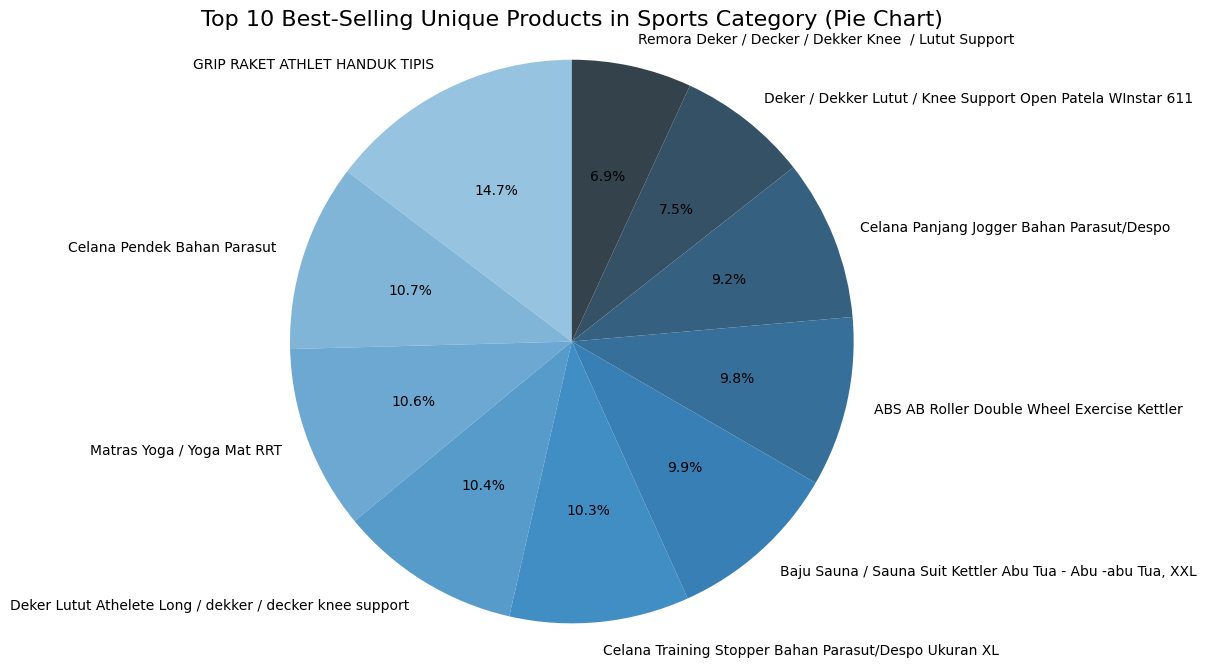

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_sports_products_unique['sold'], labels=top_sports_products_unique['product_name'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues_d', n_colors=10))
plt.title("Top 10 Best-Selling Unique Products in Sports Category (Pie Chart)", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
Carpentry_products = df[df['category'].str.contains("pertukangan", case=False, na=False)]

In [ ]:
# Remove duplicates (if any)
Carpentry_products_unique = Carpentry_products.drop_duplicates(subset='product_name')

In [ ]:
# Sort by sales and get the top 10
top_Carpentry_products_unique = Carpentry_products_unique.sort_values(by='sold', ascending=True).head(10)

In [ ]:
# Sort by sales and get the top 10
top_Carpentry_products_unique = Carpentry_products_unique.sort_values(by='sold', ascending=True).head(10)

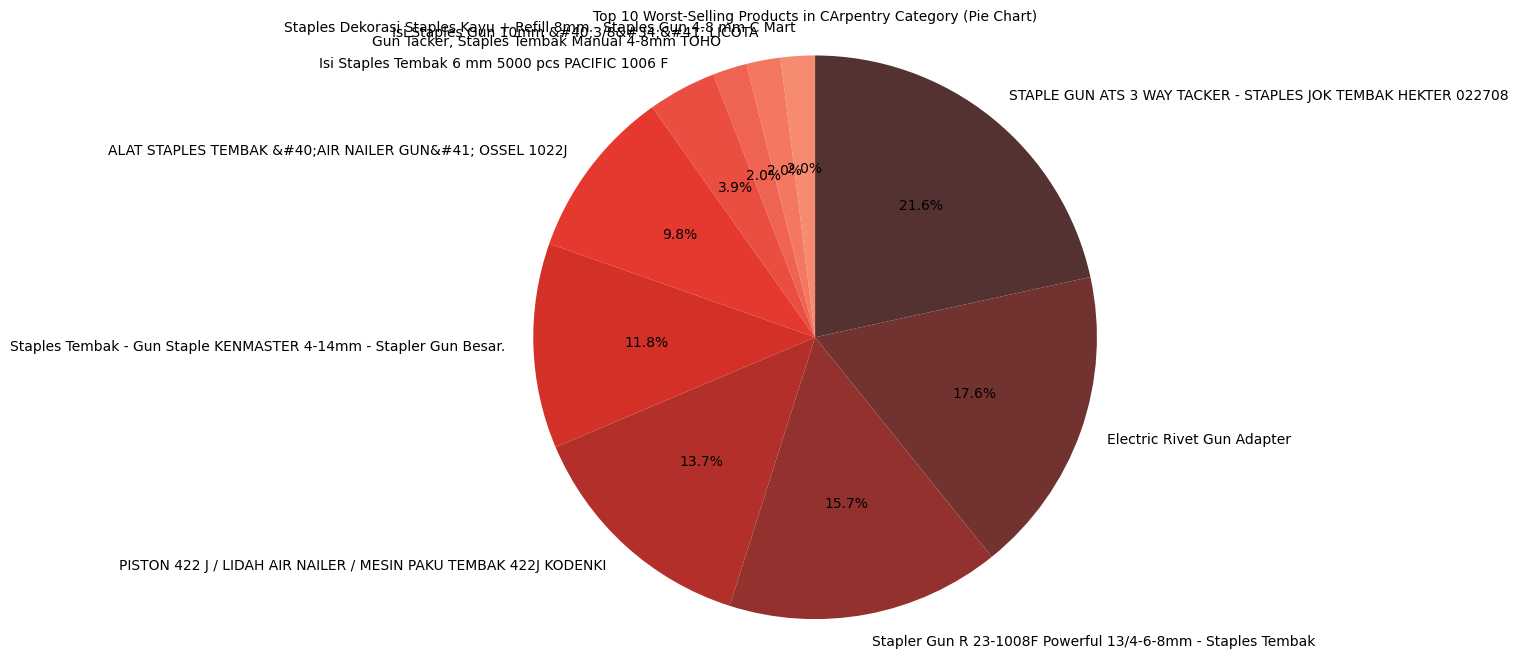

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(top_Carpentry_products_unique['sold'], labels=top_Carpentry_products_unique['product_name'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds_d', n_colors=10))
plt.title("Top 10 Worst-Selling Products in CArpentry Category (Pie Chart)", fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Sentiment Analysis and Feedback Patterns

In [ ]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['clean_text'].apply(analyze_sentiment)

In [ ]:
# Distribusi sentimen
sentiment_counts = df['sentiment'].value_counts()
print("Distribusi Sentimen:")
print(sentiment_counts)

Distribusi Sentimen:
sentiment
Neutral     32273
Positive     8116
Negative      218
Name: count, dtype: int64


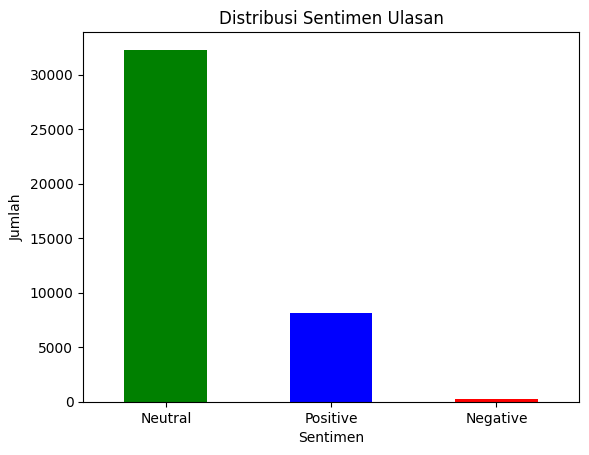

In [ ]:
# Visualisasi distribusi sentimen
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

Insights for Product Listing Optimization and Sales Stategy

In [ ]:
negative_reviews = df[df['sentiment'] == 'Negative']
products_negative = negative_reviews['product_name'].value_counts().head(10)
print("Produk dengan ulasan negatif terbanyak:")
print(products_negative)

Produk dengan ulasan negatif terbanyak:
product_name
Gamepad single Usb M-Tech/stick laptop/stick pc/joystick                      16
Headset Bluetooth Mini S530 - Micro Sport Stereo Bluetooth Earphone            8
Gamepad Double Mtech/Joystick/Gamepad Double Hitam M-Tech/Pc Laptop            6
Matras Yoga / Yoga Mat RRT                                                     6
NOKIA 130 dual sim handphone hp                                                4
TINTA / CATRIDGE HP 680 BLACK / COLOR ORIGINAL 100%                            4
USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4port&#41; DIGIGEAR HIGH QUALITY     4
USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 meter                            4
LCD Writing Tablet Board 8.5 inch Papan Tulis LCD Digital                      3
ULANZI IRON MAN 3 ST-03 CNC Metal Holder Microphone Smartphone HP              3
Name: count, dtype: int64


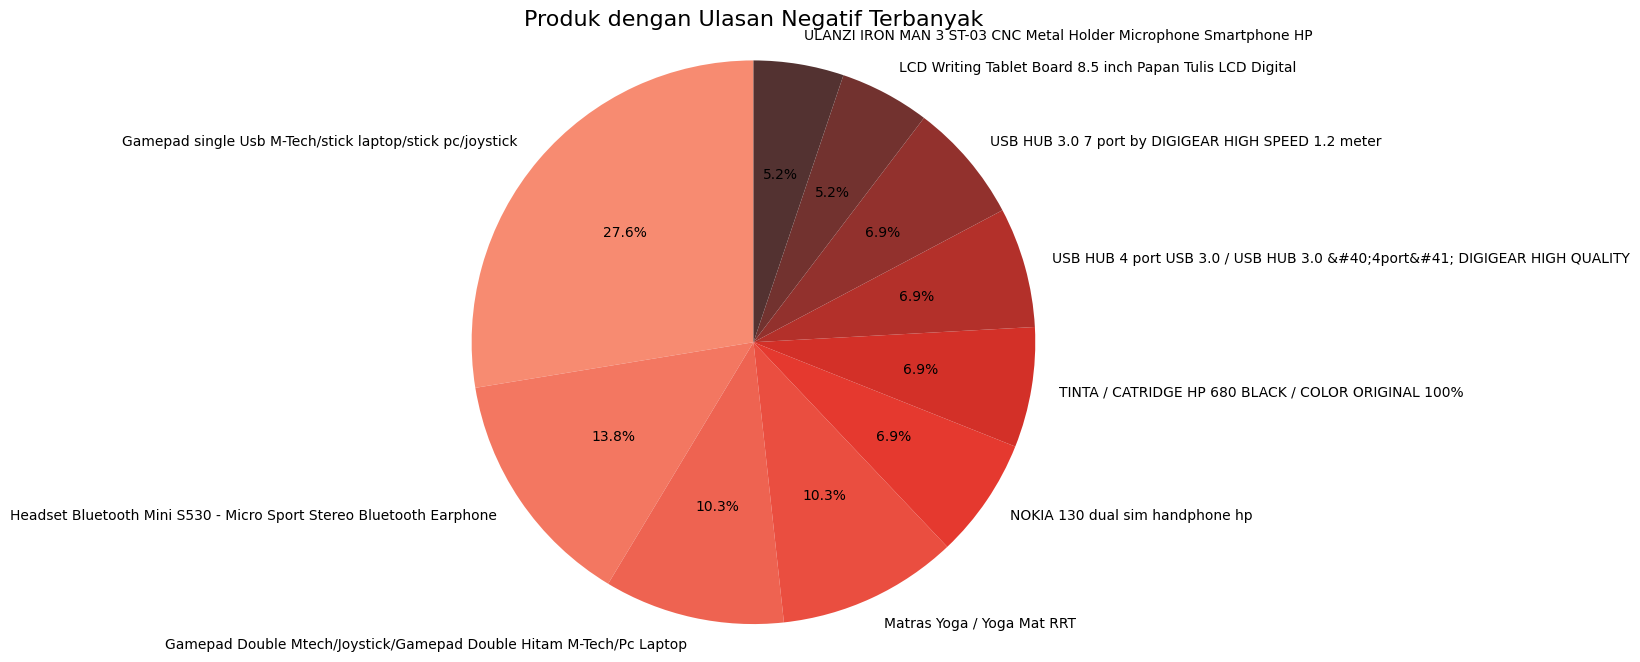

In [ ]:
products_negative.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=sns.color_palette('Reds_d', n_colors=len(products_negative)), startangle=90)

plt.title('Produk dengan Ulasan Negatif Terbanyak', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
# Analisis kategori dengan rating rata-rata tertinggi
average_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)
print("Kategori dengan rating rata-rata tertinggi:")
print(average_rating_by_category.head(10))

Kategori dengan rating rata-rata tertinggi:
category
elektronik     4.757501
fashion        4.674523
pertukangan    4.643483
olahraga       4.579740
handphone      4.378422
Name: rating, dtype: float64


In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']
products_postive = positive_reviews['product_name'].value_counts().head(10)
print("Produk dengan ulasan positif terbanyak:")
print(products_postive)

Produk dengan ulasan positif terbanyak:
product_name
TINTA / CATRIDGE HP 680 BLACK / COLOR ORIGINAL 100%                           322
Gamepad single Usb M-Tech/stick laptop/stick pc/joystick                      264
USB HUB 4 port USB 3.0 / USB HUB 3.0 &#40;4port&#41; DIGIGEAR HIGH QUALITY    245
TINTA / CATRIDGE HP 678 BLACK / COLOR ORIGINAL 100%                           242
Switch HUB TP LINK 5 Port TL-SF1005D 10/100Mbps Network Lan Internet          162
Headset Bluetooth Mini S530 - Micro Sport Stereo Bluetooth Earphone           139
Gamepad Double Mtech/Joystick/Gamepad Double Hitam M-Tech/Pc Laptop            97
jam tangan pria Biden fashion analog bisnis pita jala - Biru                   95
NOKIA 130 dual sim handphone hp                                                85
USB HUB 3.0 7 port by DIGIGEAR HIGH SPEED 1.2 meter                            85
Name: count, dtype: int64


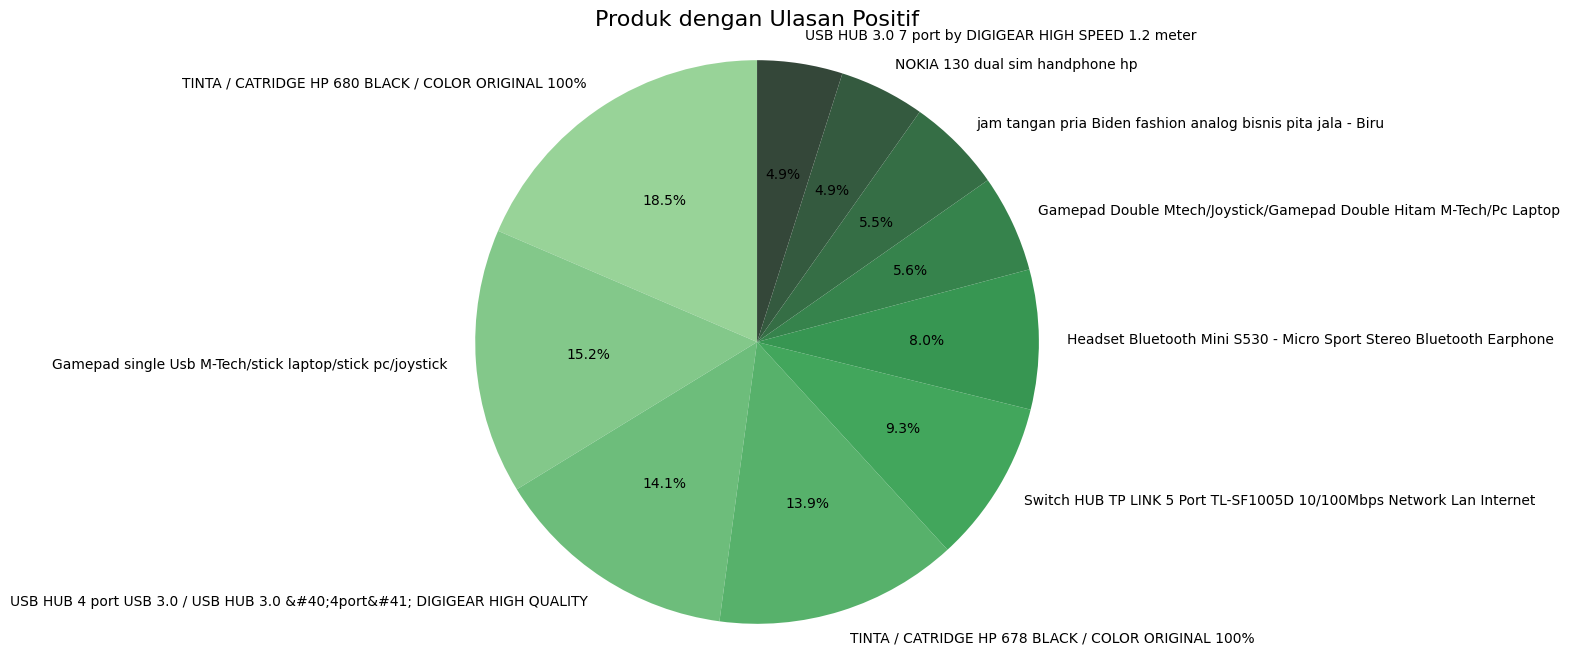

In [ ]:
products_postive.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=sns.color_palette('Greens_d', n_colors=len(products_postive)), startangle=90)

plt.title('Produk dengan Ulasan Positif', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

In [ ]:
ulasan = df['text'].dropna().astype(str)

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    return text


cleaned_ulasan = ulasan.apply(clean_text)

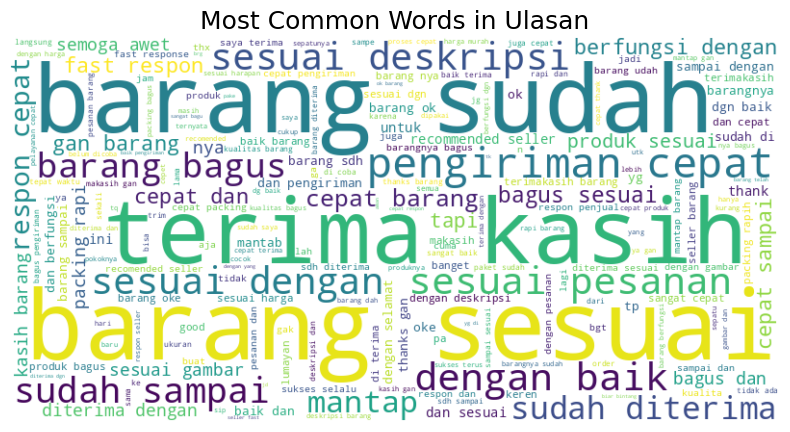

In [ ]:
wordcloud = WordCloud(stopwords=ENGLISH_STOP_WORDS, background_color='white', width=800, height=400).generate(' '.join(cleaned_ulasan))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Ulasan', fontsize=18)
plt.show()

Best Product Sell

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df[['rating_norm', 'sold_norm']] = scaler.fit_transform(df[['rating', 'sold']])

In [ ]:
df['recommendation_score'] = df['rating_norm'] * df['sold_norm']
top_recommended_products = df.sort_values(by='recommendation_score', ascending=False)

In [ ]:
top_10_recommended_products = top_recommended_products.head(10)

([<matplotlib.patches.Wedge at 0x7fd6cbb92030>,
 [Text(-0.339918873399729, 1.0461621095732052, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(-0.8899185848791348, 0.6465639274555289, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(-1.0999999999999959, -9.616505800409723e-08, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(-0.8899184718302892, -0.6465640830538323, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(-0.33991831634615544, -1.046162290570825, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(0.3399193389948208, -1.0461619582919865, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(0.88991925801448, -0.6465630009635237, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita Cewe Cowo'),
  Text(1.0999999999992995, 1.2413718640548063e-06, 'Sepatu Sekolah Nike Roshe Run Full Hitam Anak Pria Wanita

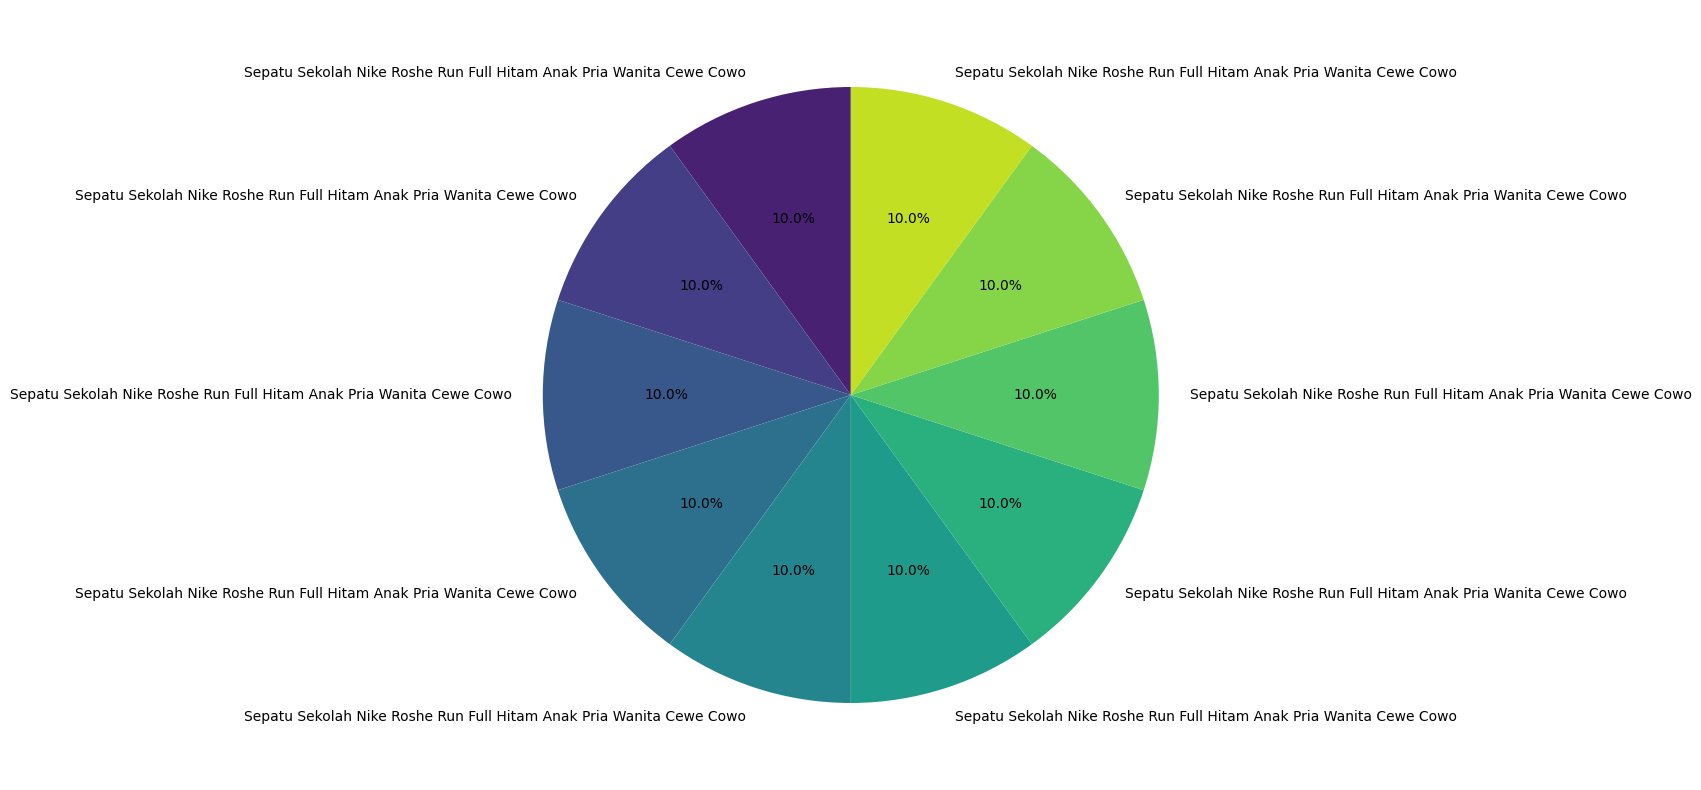

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie(top_10_recommended_products['recommendation_score'],
        labels=top_10_recommended_products['product_name'],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('viridis', n_colors=10))

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
from google.colab import userdata
import os

# ambil token dari colan
api_token = userdata.get('api_token')

# taro token ke env. variabel
os.environ['REPLICATE_API_TOKEN'] = api_token
print(api_token)

r8_0fY5x6dIYlo4iUWLFZm4Zw3sPcvfrHR1KWPAA


In [ ]:
from langchain_community.llms import Replicate

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

Streaming output truncated to the last 5000 lines.
--------------------------------------
--- Menganalisis Ulasan ID 34987 ---
Ulasan: hand glove nya bagus                                                          top
hand wrap tinju nya sekalian di add ke etalase gan
Analisis Berhasil!
Hasil Sentimen: POSITIF ✅
--------------------------------------
--- Menganalisis Ulasan ID 13061 ---
Ulasan: Pengiriman Cepat, packingan Aman barang sesuai gambar, masukan sedikit aja kalo bisa talinya jangan terlalu panjang dan ada bekas lem didalam Insole, secara keseluruhan Ok banget thks
Analisis Berhasil!
Hasil Sentimen: POSITIF ✅
--------------------------------------
--- Menganalisis Ulasan ID 13014 ---
Ulasan: bad service! smoga lebih menghargai costomer
Analisis Berhasil!
Hasil Sentimen: NEGATIF ❌
--------------------------------------
--- Menganalisis Ulasan ID 16250 ---
Ulasan: barang sesuai dengan foto, packaging juga rapih. di kasih bubble biar tidak lecet. ada box nya juga. terima kasih
An

/tmp/ipython-input-3868349072.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_ai', data=sample_data, palette='viridis')


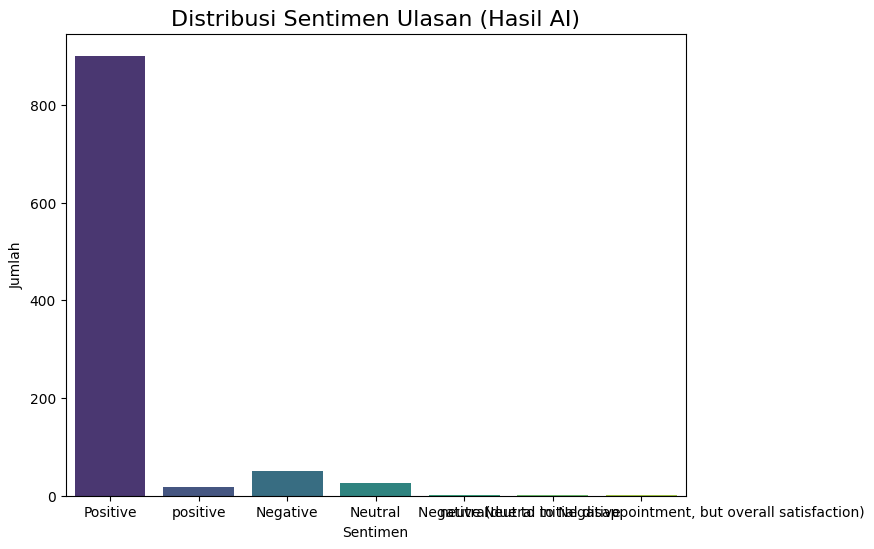

In [ ]:
# Ambil sampel data untuk demonstrasi yang lebih cepat
# Ganti angka 1000 untuk menganalisis lebih banyak ulasan
sample_size = 1000
sample_data = df.sample(n=sample_size, random_state=42).copy()

# Buat kolom baru untuk menyimpan hasil analisis AI
sample_data['sentiment_ai'] = None
sample_data['features_ai'] = None
sample_data['summary_ai'] = None

# Iterasi setiap baris di sampel data
for index, row in sample_data.iterrows():
    ulasan = row['text']
    rating = row['rating']
    kategori = row['category']
    produk_name = row['product_name']

    # Prompt yang disesuaikan
    prompt = f"""
    Please extract the following information from the product review:
    - Overall sentiment (positive, negative, or neutral)
    - Key product features mentioned
    - Summary of the review

    Review Text: {ulasan}
    Product Category: {kategori}
    Product Rating: {rating} out of 5

    Format the output strictly as:
    Sentiment: <sentiment>
    Features Mentioned: <features>
    Summary: <summary>
    """

    print(f"--- Menganalisis Ulasan ID {index} ---")
    print(f"Ulasan: {ulasan}")

    try:
        # Panggil model AI dan dapatkan output
        ai_output = llm.invoke(prompt)

        # Pisahkan output menjadi bagian-bagian
        sentiment = "N/A"
        features = "N/A"
        summary = "N/A"

        for line in ai_output.split('\n'):
            if line.startswith("Sentiment:"):
                sentiment = line.replace("Sentiment:", "").strip()
            elif line.startswith("Features Mentioned:"):
                features = line.replace("Features Mentioned:", "").strip()
            elif line.startswith("Summary:"):
                summary = line.replace("Summary:", "").strip()

        # Simpan hasil ke DataFrame
        sample_data.loc[index, 'sentiment_ai'] = sentiment
        sample_data.loc[index, 'features_ai'] = features
        sample_data.loc[index, 'summary_ai'] = summary

        print("Analisis Berhasil!")

        # --- KODE BARU UNTUK MENAMPILKAN HASIL SENTIMEN ---
        if sentiment.lower() == 'positive':
            print(f"Hasil Sentimen: POSITIF ✅")
        elif sentiment.lower() == 'negative':
            print(f"Hasil Sentimen: NEGATIF ❌")
        else:
            print(f"Hasil Sentimen: {sentiment}")
        # --- AKHIR KODE BARU ---

    except Exception as e:
        print(f"Error saat memproses ulasan: {e}")
        print("Analisis Gagal.")

    print("--------------------------------------")

# Tampilkan beberapa hasil analisis
print("\n=== Contoh Hasil Analisis AI ===")
print(sample_data[['text', 'rating', 'sentiment_ai', 'features_ai', 'summary_ai']].head())

### **Lihat Hasil Analisis Sentimen Positif atau Negatif**
# Tampilkan distribusi sentimen
print("\n=== Distribusi Sentimen dari Analisis AI ===")
print(sample_data['sentiment_ai'].value_counts())

# Filter ulasan positif
positive_reviews = sample_data[sample_data['sentiment_ai'].str.lower() == 'positive'].copy()
print("\n=== Ulasan dengan Sentimen Positif ===")
if not positive_reviews.empty:
    print(positive_reviews[['text', 'rating', 'summary_ai']].head(5))
else:
    print("Tidak ada ulasan positif dalam sampel ini.")

# Filter ulasan negatif
negative_reviews = sample_data[sample_data['sentiment_ai'].str.lower() == 'negative'].copy()
print("\n=== Ulasan dengan Sentimen Negatif ===")
if not negative_reviews.empty:
    print(negative_reviews[['text', 'rating', 'summary_ai']].head(5))
else:
    print("Tidak ada ulasan negatif dalam sampel ini.")

# Visualisasi Distribusi Sentimen
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_ai', data=sample_data, palette='viridis')
plt.title('Distribusi Sentimen Ulasan (Hasil AI)', fontsize=16)
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()